In [1]:
import optuna 
import joblib
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.cm as cm
import numpy as np 

plt.style.use('seaborn')

dataset = 'ogb_arxiv'

study_name = '_'.join([
    dataset,
    'gcn',
    '2',
    'KDE',
    'mb',
])

study = optuna.load_study(
    study_name=study_name, 
    storage='sqlite:///{}.db'.format(study_name),
)

best_trails = []

for trail in study.trials:
# for trail in study.best_trials:
    acc, auc = trail.values
    betas = []
    aug = trail.params['aug_pe']
    for layer_id in range(3): # 2 gconv + 1 Linear
        param_name = 'layer-{}'.format(layer_id)
        betas.append(trail.params[param_name])
        if layer_id != 2:
            param_name = 'layer_inter-{}'.format(layer_id)
            betas.append(trail.params[param_name])
    best_trails.append((aug, betas, acc, auc ))

best_trails

/vol/home/lanlong/xuanli/torch12/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_725836/215050663.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[(0.17,
  [0.47000000000000003, 0.51, 1.73, 1.03, 0.56],
  0.5601503759398496,
  1.5641152262687683),
 (0.31,
  [2.83, 1.03, 0.72, 1.42, 1.61],
  0.5538847117794485,
  1.5465670228004456),
 (0.42,
  [0.42, 1.1300000000000001, 1.51, 1.09, 0.55],
  0.513157894736842,
  1.5350536704063416)]

In [1]:
import optuna 
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.cm as cm
import numpy as np 

plt.style.use('seaborn')

dataset = 'cora'
study = optuna.load_study(
    study_name=dataset + '_sb', 
    storage='sqlite:///{}.db'.format(dataset + '_sb'),
)

best_trails = []
all_trails = []


max_beta = 0
min_beta = 1e10
for trail in study.trials: # best_trials
    acc, auc = trail.values
    beta = trail.params['beta']
    if beta > max_beta:
        max_beta = beta
    elif beta < min_beta:
        min_beta = beta
    all_trails.append((beta, acc, auc ))

norm = matplotlib.colors.Normalize(vmin=min_beta, vmax=max_beta)
cmap = matplotlib.cm.get_cmap('Spectral')

for trail_info in all_trails:
    beta, acc, auc = trail_info
    plt.scatter(auc, acc, color=cmap(norm(beta)))

im1 = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar1 = plt.colorbar(
    im1, orientation='horizontal',
    # ticks=np.linspace(min_beta, max_beta, int(1e5)),
    label='beta'
)

plt.xlabel('AUC')
plt.ylabel('Acc')
plt.title('cora|no norm|KDE')


/vol/home/lanlong/xuanli/torch12/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_164657/2782256491.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


KeyError: 'Record does not exist.'

In [10]:
root = 'Optuna_file'

# path = 'coraaug_study.pkl'
# path = 'citeseer_study.pkl'
# path = 'usairaug_study.pkl'
# path = 'AIDSaug_study.pkl'
# path = 'brazilaug_study.pkl'
path = 'citeseer2_study.pkl'
import os.path as osp 
dataset_name = osp.splitext(path)[0].split('_')[0]

In [11]:
import joblib
import pandas as pd
study = joblib.load(osp.join(root, path))

best_trails = []

for trail in study.best_trials:
    acc, auc = trail.values
    beta2 = trail.params['beta2']
    best_trails.append((beta2, acc, auc ))


best_trails_df = pd.DataFrame (best_trails, columns = ['beta2', 'acc', 'auc'])
best_trails_df.to_csv(dataset_name+'_best.csv')

In [12]:
best_trails_df['Acc/AUC'] = best_trails_df['acc'] / best_trails_df['auc']
best_trails_df.sort_values(by=['Acc/AUC'],na_position='first', inplace=True)
best_trails_df.to_csv(dataset_name+'_best.csv')

In [13]:
import pandas as pd 
# usair
results = pd.DataFrame(study.trials_dataframe(), columns=['params_beta2', 'values_0', 'values_1'])
results.rename(columns={'params_beta2':'beta_2', 'values_0':'Acc', 'values_1':'Auc'}, inplace = True)

# new_row = {'beta_2':0, 'Acc':0.7910, 'Auc':0.789580,} # cora
# new_row = {'beta_2':0, 'Acc':0.5016, 'Auc':0.7333,} # usair
new_row = {'beta_2':0, 'Acc':0.6266, 'Auc':0.814343,} # Citter
# new_row = {'beta_2':0, 'Acc':0.6498, 'Auc':0.715049,} # AIDS 
# new_row = {'beta_2':0, 'Acc':0.6923, 'Auc':0.695573,} # brazil  
# new_row = {'beta_2':0, 'Acc': , 'Auc': ,} # polblog  
results = results.append(new_row, ignore_index=True)
results

/tmp/ipykernel_37213/1864173735.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,beta_2,Acc,Auc
0,3.745464e+07,0.265038,0.516019
1,9.507148e+07,0.228697,0.510609
2,7.319966e+07,0.173559,0.541742
3,5.986625e+07,0.227444,0.495689
4,1.560271e+07,0.405388,0.534191
...,...,...,...
196,1.552464e+07,0.190476,0.471643
197,1.156187e+07,0.408521,0.572159
198,9.568620e+06,0.398496,0.547166
199,7.019540e+06,0.400376,0.570217


In [14]:
plain_acc = results.tail(1)['Acc'].values[0]
plain_auc = results.tail(1)['Auc'].values[0]

results['Acc_diff'] = results['Acc'] - (plain_acc)
results['AUC_diff'] = results['Auc'] - (plain_auc)
results

,beta_2,Acc,Auc,Acc_diff,AUC_diff
0,3.745464e+07,0.265038,0.516019,-0.361562,-0.298324
1,9.507148e+07,0.228697,0.510609,-0.397903,-0.303734
2,7.319966e+07,0.173559,0.541742,-0.453041,-0.272601
3,5.986625e+07,0.227444,0.495689,-0.399156,-0.318654
4,1.560271e+07,0.405388,0.534191,-0.221212,-0.280152
...,...,...,...,...,...
196,1.552464e+07,0.190476,0.471643,-0.436124,-0.342700
197,1.156187e+07,0.408521,0.572159,-0.218079,-0.242184
198,9.568620e+06,0.398496,0.547166,-0.228104,-0.267177
199,7.019540e+06,0.400376,0.570217,-0.226224,-0.244126


           beta2       acc       auc   Acc/AUC
17  4.002538e+07  0.315163  0.473189  0.666041
13  8.743344e+06  0.300752  0.435816  0.690089
4   1.089042e+05  0.603383  0.805004  0.749541
10  4.321771e+04  0.610902  0.809552  0.754618
11  6.789917e+03  0.649749  0.839295  0.774161
16  3.025150e+03  0.642231  0.820195  0.783021
14  8.288983e+06  0.399123  0.499929  0.798360
7   9.318779e+06  0.387218  0.481353  0.804436
15  2.647933e+04  0.602757  0.749281  0.804447
9   4.768518e+06  0.476817  0.578124  0.824765
18  1.627392e+06  0.489975  0.589578  0.831060
12  2.638832e+06  0.508772  0.607968  0.836841
6   5.955349e+06  0.422306  0.501530  0.842035
0   1.244053e+06  0.574561  0.678252  0.847121
19  7.244720e+06  0.453634  0.531205  0.853971
8   3.409453e+06  0.467419  0.547187  0.854221
1   1.087698e+06  0.543233  0.632616  0.858709
5   7.136673e+05  0.588346  0.680451  0.864641
2   1.145142e+06  0.593358  0.685007  0.866208
3   4.283524e+05  0.561404  0.640558  0.876429


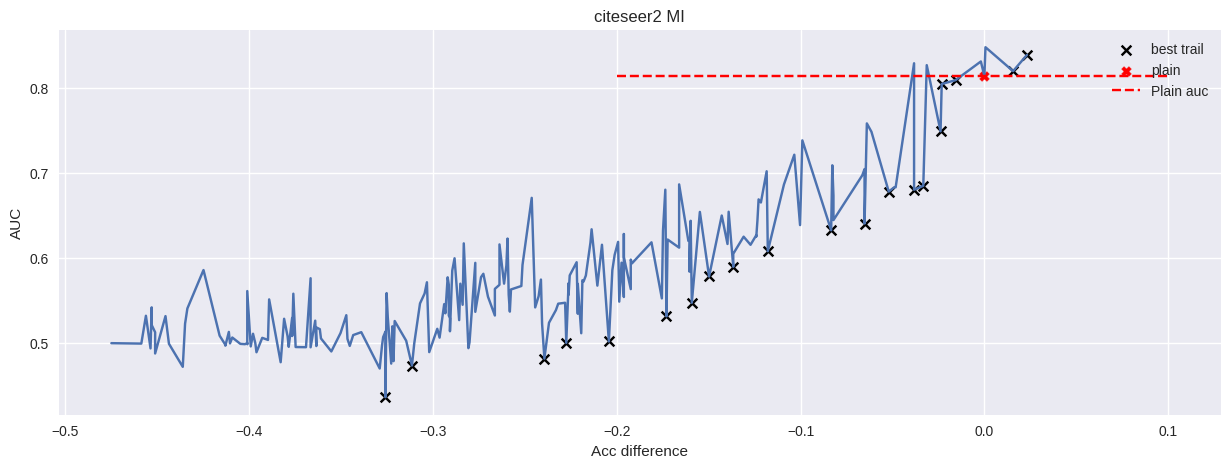

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
results.sort_values(by=['Acc_diff'],na_position='first', inplace=True)
plt.figure(figsize=(15,5)) 
plt.plot(results['Acc_diff'], results['Auc'])

for best_trail in best_trails:
    _ ,acc, auc = best_trail
    best_trail = plt.scatter(acc-plain_acc, auc, c='black', marker='x', label='best trail')

plain = plt.scatter(0, plain_auc, c='red', marker='X', label='plain')
# vlines(x, ymin, ymax)
# hlines(y, xmin, xmax)
plain_auc_line = plt.hlines(plain_auc, -0.2, 0.1, colors = "r", linestyles = "dashed", label='Plain auc')

plt.title(dataset_name+' MI')
plt.xlabel('Acc difference')
plt.ylabel('AUC')

from collections import OrderedDict

 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

print(best_trails_df)

           beta2       acc       auc   Acc/AUC
17  4.002538e+07  0.315163  0.473189  0.666041
13  8.743344e+06  0.300752  0.435816  0.690089
4   1.089042e+05  0.603383  0.805004  0.749541
10  4.321771e+04  0.610902  0.809552  0.754618
11  6.789917e+03  0.649749  0.839295  0.774161
16  3.025150e+03  0.642231  0.820195  0.783021
14  8.288983e+06  0.399123  0.499929  0.798360
7   9.318779e+06  0.387218  0.481353  0.804436
15  2.647933e+04  0.602757  0.749281  0.804447
9   4.768518e+06  0.476817  0.578124  0.824765
18  1.627392e+06  0.489975  0.589578  0.831060
12  2.638832e+06  0.508772  0.607968  0.836841
6   5.955349e+06  0.422306  0.501530  0.842035
0   1.244053e+06  0.574561  0.678252  0.847121
19  7.244720e+06  0.453634  0.531205  0.853971
8   3.409453e+06  0.467419  0.547187  0.854221
1   1.087698e+06  0.543233  0.632616  0.858709
5   7.136673e+05  0.588346  0.680451  0.864641
2   1.145142e+06  0.593358  0.685007  0.866208
3   4.283524e+05  0.561404  0.640558  0.876429


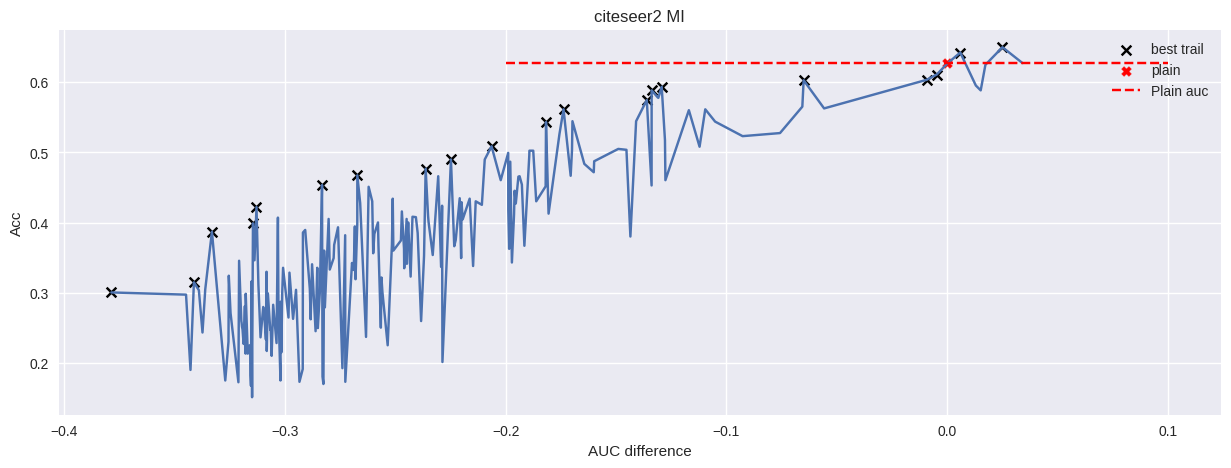

In [16]:
import matplotlib.pyplot as plt

results.sort_values(by=['AUC_diff'],na_position='first', inplace=True)
plt.figure(figsize=(15,5)) 
plt.plot(results['AUC_diff'], results['Acc'])

for best_trail in best_trails:
    _ ,acc, auc = best_trail
    best_trail = plt.scatter(auc-plain_auc, acc, c='black', marker='x', label='best trail')

plain = plt.scatter(0, plain_acc, c='red', marker='X', label='plain')
# vlines(x, ymin, ymax)
# hlines(y, xmin, xmax)
plain_auc_line = plt.hlines(plain_acc, -0.2, 0.1, colors = "r", linestyles = "dashed", label='Plain auc')

plt.title(dataset_name+' MI')
plt.xlabel('AUC difference')
plt.ylabel('Acc')

from collections import OrderedDict

 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

print(best_trails_df)

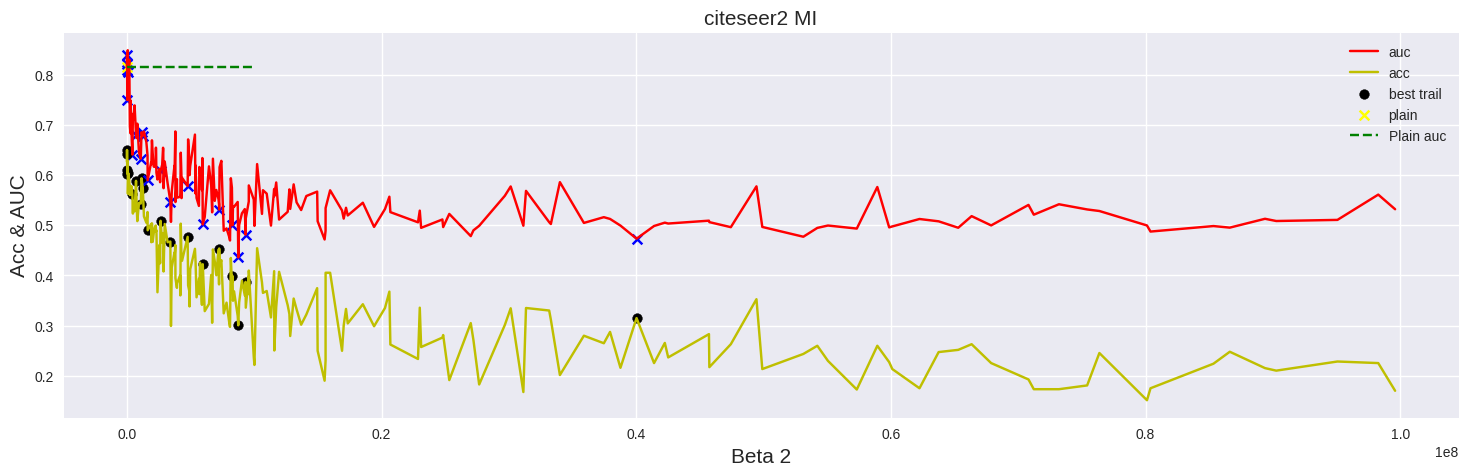

In [17]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
results.sort_values(by=['beta_2'],na_position='first', inplace=True)
plt.figure(figsize=(18, 5))
# fig,ax1 = plt.subplots()
# ax2 = ax1.twinx() 

# ax1.set_ylabel('Auc',color = 'w', fontsize=15)   #设置Y1轴标题
# ax2.set_ylabel('Acc',color = 'w', fontsize=15)    #设置Y2轴标题
# plt.axes(xscale = "log")   
plt.plot(results['beta_2'], results['Auc'], label='auc', color='r')
plt.plot(results['beta_2'], results['Acc'], label='acc', color='y')

for best_trail in best_trails:
    beta2, acc, auc = best_trail
    plt.scatter(beta2, auc, c='b', marker='x', label='best trail')
    plt.scatter(beta2, acc, c='black', marker='o', label='best trail')

plain = plt.scatter(0, plain_auc, c='yellow', marker='x', label='plain')
# vlines(x, ymin, ymax)
# hlines(y, xmin, xmax)
plain_auc_line = plt.hlines(plain_auc, xmin=0, xmax=1e7, colors = "green", linestyles = "dashed", label='Plain auc')

plt.title(dataset_name+' MI', fontsize=15)
plt.xlabel('Beta 2', fontsize=15)
plt.ylabel('Acc & AUC', fontsize=15)

from collections import OrderedDict

 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)


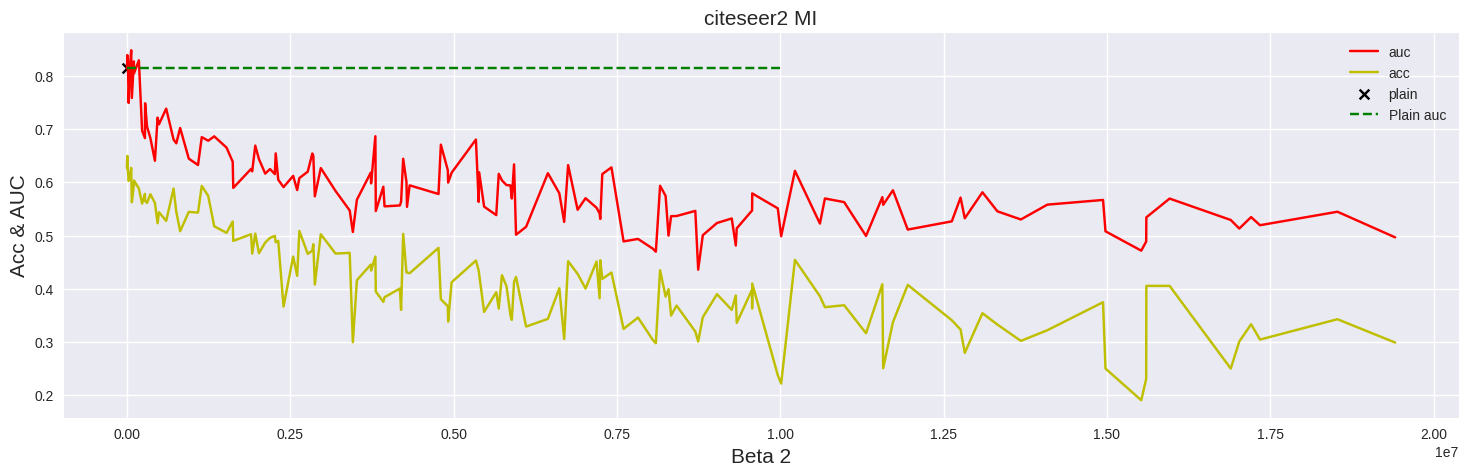

In [18]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
results.sort_values(by=['beta_2'],na_position='first', inplace=True)
results = results[results['beta_2']< (1e8 * 0.2)]
plt.figure(figsize=(18, 5))
# fig,ax1 = plt.subplots()
# ax2 = ax1.twinx() 

# ax1.set_ylabel('Auc',color = 'w', fontsize=15)   #设置Y1轴标题
# ax2.set_ylabel('Acc',color = 'w', fontsize=15)    #设置Y2轴标题
# plt.axes(xscale = "log")   
plt.plot(results['beta_2'], results['Auc'], label='auc', color='r')
plt.plot(results['beta_2'], results['Acc'], label='acc', color='y')

# for best_trail in best_trails:
#     beta2, acc, auc = best_trail
#     plt.scatter(beta2, auc, c='b', marker='x', label='best trail')
#     plt.scatter(beta2, acc, c='black', marker='o', label='best trail')

plain = plt.scatter(0, plain_auc, c='black', marker='x', label='plain')
# vlines(x, ymin, ymax)
# hlines(y, xmin, xmax)
plain_auc_line = plt.hlines(plain_auc, xmin=0, xmax=1e7, colors = "green", linestyles = "dashed", label='Plain auc')

plt.title(dataset_name+' MI', fontsize=15)
plt.xlabel('Beta 2', fontsize=15)
plt.ylabel('Acc & AUC', fontsize=15)

from collections import OrderedDict

 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)
